In [4]:
import pandas as pd
import numpy as np

# train and test split function
from sklearn.model_selection import train_test_split

# for creating binary labels of target variables
from sklearn.preprocessing import label_binarize

# k-NN Model function
from sklearn.neighbors import KNeighborsClassifier

# Performance functions
from sklearn import metrics
from pandas_ml import ConfusionMatrix

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<b> Data Source:</b>
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

<b>Data Description: </b>
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

In [5]:
df = pd.read_csv('../data/breast-cancer-wisconsin.data.txt',
                 header=None, 
                 names=('Case id', 
                        'Clump Thickness',
                        'Uniformity of Cell Size',
                        'Uniformity of Cell Shape',
                        'Marginal Adhesion',
                        'Single Epithelial Cell Size',
                        'Bare Nuclei',
                        'Bland Chromatin',
                        'Normal Nucleoli',
                        'Mitoses',
                        'Class'),
                 index_col=0,
                 na_values='?')

df.shape

(699, 10)

<b> Checking for null values</b>

In [6]:
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Depending on use case we can decide how to take care of missing values, in this demo we are not much concerned with missing values. Therefore, I'm going to remove all those NA values.

In [7]:
df = df.dropna()
df.shape

(683, 10)

<b><u>Class Label</u>:</b> <p> 2 for benign <p>4 for malignant

In [8]:
df.head(6)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Case id,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4


<b> <font color="maroon">Splitting the data set into 66% Training Data, 33% Test data.</font></b>

In [9]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Converting malignant class to 1 (positive case) and Benign class to be 0 (negative case)
# label_binarize: 1st class would be 0('2' in this case) and second class will be 1('4' in this case.)
y = label_binarize(y, classes=[2,4])

y = y.ravel() # To convert column-vector 'y' to 1d array

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=SEED)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

### <u> Performance Metrics</u>

### a) Using sklearn functions

<b>1) Accuracy</b>

In [11]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print 'Accuracy: {0:.2f} %'.format(100 * accuracy)

Accuracy: 95.61 %


<b>2) ROC and AUC</b>

In [12]:
#y_pred_prob[:,1] : 1d array of probability of positive label
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

print 'Area under the curve: {0:.2f}'.format(roc_auc)

Area under the curve: 0.99


<b> ROC Curve</b>

Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

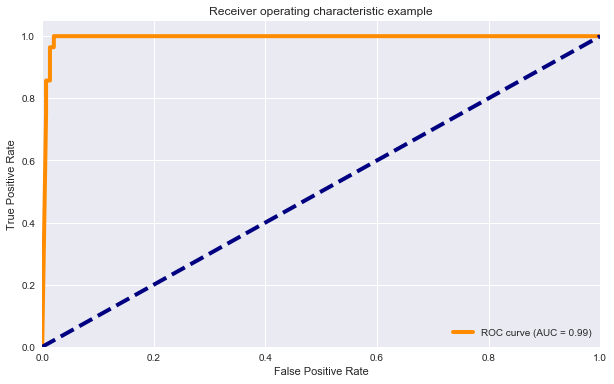

In [13]:
plt.figure(figsize=(10,6))
lw = 4 # line weight

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, 
         label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Setting labels, title and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

<b> 3) Precision, Recall, Support, and f-measure</b>

In [14]:
print metrics.classification_report(y_test, y_pred, target_names=['benign', 'malignant'])

             precision    recall  f1-score   support

     benign       0.95      0.99      0.97       144
  malignant       0.97      0.90      0.94        84

avg / total       0.96      0.96      0.96       228



<b> 4) Confusion Matrix </b>

In [15]:
c_m = metrics.confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(c_m, 
                           columns=["Predicted Benign", "Predicted Malignant"],
                           index=["Actual Benign", "Actual Malignant"])
conf_matrix

,Predicted Benign,Predicted Malignant
Actual Benign,142,2
Actual Malignant,8,76


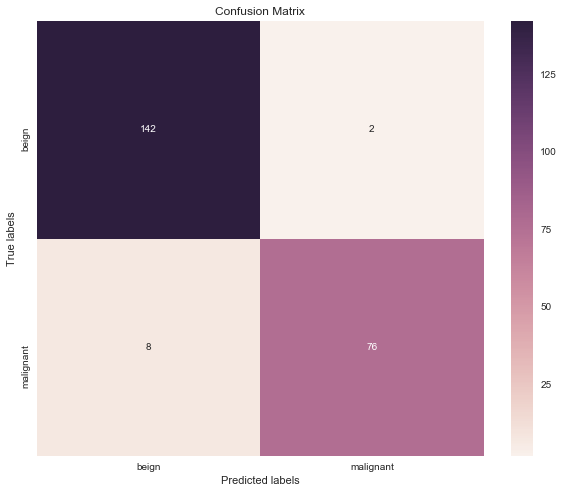

In [16]:
# Credit - https://stackoverflow.com/a/48018785/7929998

fig, ax= plt.subplots(figsize=(10, 8))
sns.heatmap(c_m, annot=True, ax = ax, fmt='g')

# Setting labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['beign', 'malignant']); ax.yaxis.set_ticklabels(['malignant', 'beign'])

plt.show()

### b) Using 'pandas_ml' package

<i>from pandas_ml import ConfusionMatrix</i>
<p>Source: http://pandas-ml.readthedocs.io/en/stable/conf_mat.html#seaborn-plot-of-a-binary-confusion-matrix-todo

In [17]:
# Creating new array with class labels as 'beign' and 'malignant'
y_test_label = np.where(y_test == 0, 'benign', 'malignant')
y_pred_label = np.where(y_pred == 0, 'benign', 'malignant')
cm = ConfusionMatrix(y_test_label, y_pred_label)
cm

Predicted  benign  malignant  __all__
Actual                               
benign        142          2      144
malignant       8         76       84
__all__       150         78      228

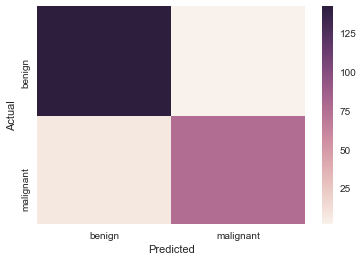

In [18]:
cm.plot(backend='seaborn')

<b> Class statistics of confusion matrix </b>

In [19]:
cm.print_stats()

population: 228
P: 84
N: 144
PositiveTest: 78
NegativeTest: 150
TP: 76
TN: 142
FP: 2
FN: 8
TPR: 0.904761904762
TNR: 0.986111111111
PPV: 0.974358974359
NPV: 0.946666666667
FPR: 0.0138888888889
FDR: 0.025641025641
FNR: 0.0952380952381
ACC: 0.956140350877
F1_score: 0.938271604938
MCC: 0.905823873894
informedness: 0.890873015873
markedness: 0.921025641026
prevalence: 0.368421052632
LRP: 65.1428571429
LRN: 0.0965794768612
DOR: 674.5
FOR: 0.0533333333333


Statistics are also available as an OrderedDict using: <i>cm.stats()</i>
<p>This way you can use any specific element of stats.

In [20]:
accuracy = cm.stats()['ACC']

print 'Accuracy: {0:.2f} %'.format(100.0 * accuracy)

Accuracy: 95.61 %


### <u> Other Visualizations</u>

<b>Cumulative Response Curve</b>

In [21]:
df_temp = pd.DataFrame({'y_test': y_test, 'y_pred_prob': y_pred_prob[:, 1]})
df_temp = df_temp.sort_values(['y_pred_prob'], ascending=False)
df_temp.reset_index(inplace=True, drop=True)

y_test_sorted = df_temp['y_test']
y_test_len = y_test.shape[0]

percent_positive_target = y_test_sorted.cumsum()/y_test_sorted.sum() * 100.0
percent_test_instance = pd.Series(np.asarray(range(1,(y_test_len + 1)))*100.0/y_test_len)

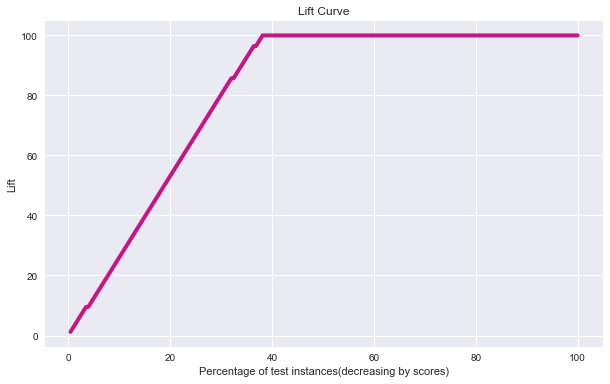

In [22]:
plt.figure(figsize=(10,6))
plt.plot(percent_test_instance, percent_positive_target, color='mediumvioletred', lw=4)
plt.xlabel('Percentage of test instances(decreasing by scores)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.show()

<b> Lift Curve</b>

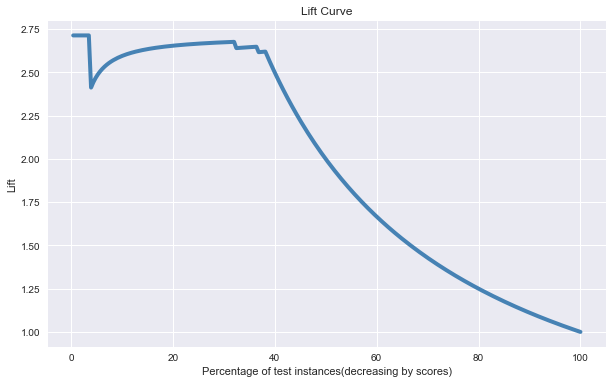

In [23]:
lift = percent_positive_target/percent_test_instance

plt.figure(figsize=(10,6))
plt.plot(percent_test_instance, lift, color='steelblue', lw=4)
plt.xlabel('Percentage of test instances(decreasing by scores)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.show()